In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
sns.set_theme()

In [ ]:
def draw_bar_chart(x_axis,y_axis,x_name= None, y_name = None,x_axis_rotation = None):
    plt.bar(x = x_axis, height = y_axis, color = 'green')
    plt.xticks(x_axis,rotation = x_axis_rotation)
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    plt.show()

In [ ]:
def draw_pie(data,labels):
    #define Seaborn color palette to use
    colors = sns.color_palette('pastel')[0:10]
    #create pie chart
    plt.pie(
        data, labels = labels, 
        colors = colors, autopct='%.0f%%', 
        radius= 2)
        
    # x_axis_legend = -0,5
    # y_axis_legend = 0.2
    plt.legend(loc="lower right", bbox_to_anchor=(-0.5, 0.2))
    plt.show()

In [ ]:
path = './sources/cereal.csv'
raw_data_frame = pd.read_csv(path)

In [ ]:
df = raw_data_frame
df.head()

In [ ]:
df.info()

In [ ]:
df['mfr'].unique()

In [ ]:
df['type'].unique()

In [ ]:
sns.countplot(data = df, x ='mfr');

In [ ]:
data = (list(df['mfr'].value_counts()))
labels = list(df['mfr'].value_counts().index)
draw_pie(data, labels)

In [ ]:
sns.displot(data =df , x = 'rating' , hue ='type', kde =True);

In [ ]:
sns.displot(data = df, x = 'fat');

In [ ]:
list_nutrition = ['calories', 'fat', 'sodium', 'carbo', 'sugars', 'potass','fiber'  , 'vitamins','protein']

In [ ]:
for nutrition in list_nutrition:   
    plt.figure()
    sns.barplot(data =df, x ='type', y = nutrition, estimator=np.mean);

In [ ]:
for nutrition in list_nutrition:
    plt.figure()    
    sns.regplot(data = df, x = 'rating', y =nutrition);

In [ ]:
df['weight'].mean()

In [ ]:
df.head()

In [ ]:
list_nutrition_value = []
for nutrition in list_nutrition:
    nutrition_value = df[nutrition].mean()
    list_nutrition_value.append(nutrition_value)
list_nutrition_value

In [ ]:
data = list_nutrition_value
labels = list_nutrition
draw_pie(data, labels)

In [ ]:
for nutrition in list_nutrition:    
    mfr_nutrition= df.groupby('mfr')[nutrition].sum()
    list_mfr = mfr_nutrition.index
    draw_bar_chart(list_mfr,mfr_nutrition,nutrition)

In [46]:
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [51]:
# Irrelevant fields
field = ['shelf', 'weight', 'cups', 'rating']
cereals_df_new = df.drop(field, axis =1) 
cereals_df_new.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25


In [69]:
# Get correlation data only get number return matrix
cereal_corr= cereals_df_new.corr()
cereal_corr

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins
calories,1.000000,0.019066,0.498610,0.300649,-0.293413,0.250681,0.562340,-0.066609,0.265356
protein,0.019066,1.000000,0.208431,-0.054674,0.500330,-0.130864,-0.329142,0.549407,0.007335
fat,0.498610,0.208431,1.000000,-0.005407,0.016719,-0.318043,0.270819,0.193279,-0.031156
sodium,0.300649,-0.054674,-0.005407,1.000000,-0.070675,0.355983,0.101451,-0.032603,0.361477
fiber,-0.293413,0.500330,0.016719,-0.070675,1.000000,-0.356083,-0.141205,0.903374,-0.032243
carbo,0.250681,-0.130864,-0.318043,0.355983,-0.356083,1.000000,-0.331665,-0.349685,0.258148
sugars,0.562340,-0.329142,0.270819,0.101451,-0.141205,-0.331665,1.000000,0.021696,0.125137
potass,-0.066609,0.549407,0.193279,-0.032603,0.903374,-0.349685,0.021696,1.000000,0.020699
vitamins,0.265356,0.007335,-0.031156,0.361477,-0.032243,0.258148,0.125137,0.020699,1.000000


In [64]:
# ones_like can build a matrix of booleans with the same shape of our data
ones_corr = np.ones_like(cereal_corr, dtype= bool)
ones_corr

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True]])

In [67]:
# np.triu: retun only upper triangle matrix
mask = np.triu(ones_corr)
mask

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True,  True],
       [False, False, False, False, False, False, False,  True,  True],
       [False, False, False, False, False, False, False, False,  True]])

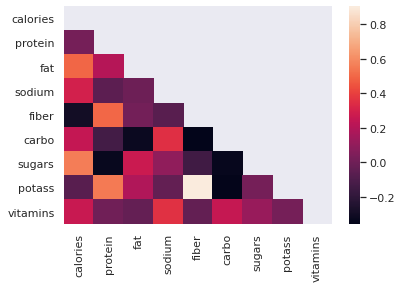

In [70]:
sns.heatmap(data =cereal_corr, mask= mask);

In [76]:
# first row and last column is empty so i remove it
first_row =1
last_column = -1
adjusted_mask = mask[first_row:, : last_column]
adjusted_mask

array([[False,  True,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True],
       [False, False, False, False, False, False, False,  True],
       [False, False, False, False, False, False, False, False]])

In [81]:
# cereal_corr is DataFrame, mask is a np matrix
adjusted_cereal_corr = cereal_corr.iloc[first_row: , : last_column]
adjusted_cereal_corr

,calories,protein,fat,sodium,fiber,carbo,sugars,potass
protein,0.019066,1.000000,0.208431,-0.054674,0.500330,-0.130864,-0.329142,0.549407
fat,0.498610,0.208431,1.000000,-0.005407,0.016719,-0.318043,0.270819,0.193279
sodium,0.300649,-0.054674,-0.005407,1.000000,-0.070675,0.355983,0.101451,-0.032603
fiber,-0.293413,0.500330,0.016719,-0.070675,1.000000,-0.356083,-0.141205,0.903374
carbo,0.250681,-0.130864,-0.318043,0.355983,-0.356083,1.000000,-0.331665,-0.349685
sugars,0.562340,-0.329142,0.270819,0.101451,-0.141205,-0.331665,1.000000,0.021696
potass,-0.066609,0.549407,0.193279,-0.032603,0.903374,-0.349685,0.021696,1.000000
vitamins,0.265356,0.007335,-0.031156,0.361477,-0.032243,0.258148,0.125137,0.020699


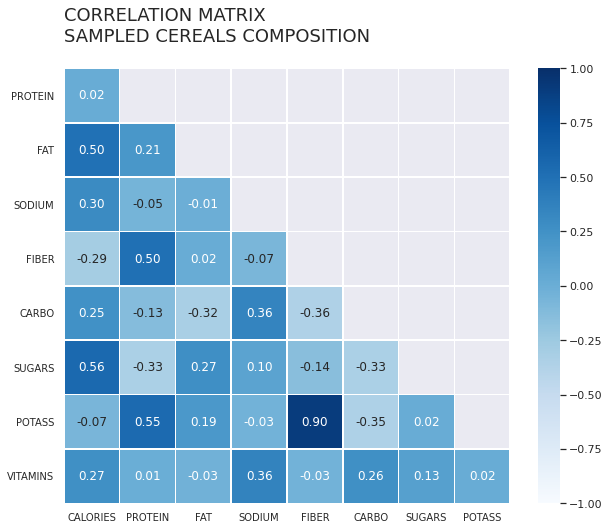

In [108]:
fig, ax = plt.subplots(figsize = (10,8))
sns.heatmap(    
    data = adjusted_cereal_corr,
    mask = adjusted_mask,
    # Show number 
    annot = True,
    # Round number
    fmt = ".2f",
    # Set color
    cmap ='Blues',
    # Set limitation of color bar (right)
    vmin = -1, vmax =1,
    # Color of the lines that will divide each cell.
    linecolor = 'white',
    # Width of the lines that will divide each cell.  
    linewidths = 0.5,
    );

yticks = [i.upper () for i in adjusted_cereal_corr.index]
xticks = [i.upper () for i in adjusted_cereal_corr.columns]

ax.set_yticklabels(yticks, rotation = 0, fontsize =10);
ax.set_xticklabels(xticks, rotation = 0, fontsize =10);

title = 'CORRELATION MATRIX\nSAMPLED CEREALS COMPOSITION\n'
ax.set_title(title, loc ='left', fontsize = 18);